In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
plt.rcParams.update({'font.size': 12})

# Árvores de decisão

Uma árvore de decisão é uma árvore binária onde os vários nós não-terminais correspondem a decisões acerca da amostra sendo analisada, e as folhas correspondem aos valores de predição. Por exemplo, considere o famoso dataset "Iris" e o problema de classificar as flores em "virginica", "versicolor" e "setosa".

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.Series(iris['target'], name='class')

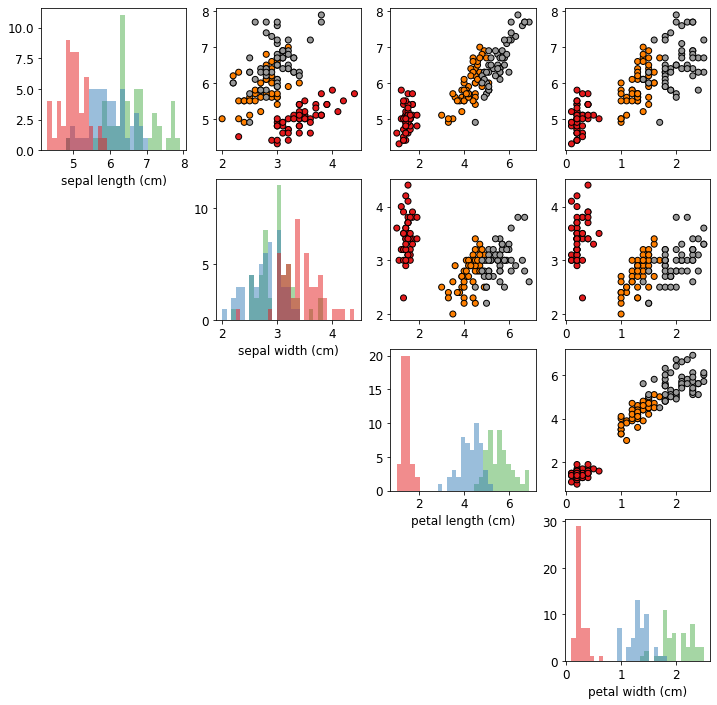

In [11]:
def plot_hist(X, y):
    bins = np.linspace(X.min(), X.max(), 30)
    for c in y.value_counts().index:
        plt.hist(X[y == c].values, bins=bins, label=str(c), 
                 alpha=0.5, color=plt.cm.Set1.colors[c])

def plot_scatter(X, y):
    cols = X.columns
    n = len(cols)
    for i in range(n):
        plt.subplot(n, n, i*n + i + 1)
        plot_hist(X[cols[i]], y)
        plt.xlabel(cols[i])

        for j in range(i+1, n):
            plt.subplot(n, n, i*n + j + 1)
            plt.scatter(X[cols[j]], X[cols[i]], c=y, cmap=plt.cm.Set1, edgecolor='k')
    
plt.figure(figsize=(12, 12))
plot_scatter(X, y)
plt.show()

 Para simplificar nossa explanação, vamos nos limitar ao uso de apenas duas características: sepal width e petal width

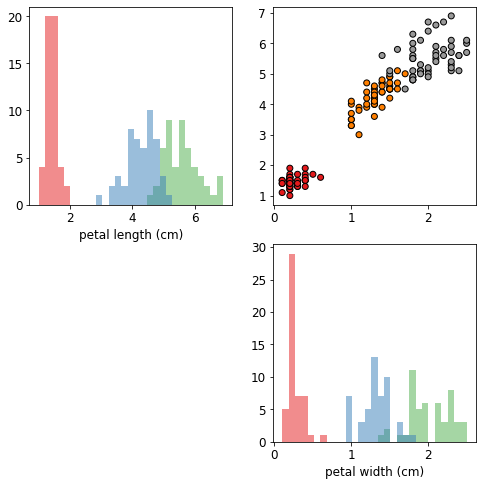

In [12]:
X_simple = X[['petal length (cm)', 'petal width (cm)']]
plt.figure(figsize=(8, 8))
plot_scatter(X_simple, y)
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_simple, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="iris_tree.dot", 
                feature_names=['petal length (cm)', 'petal width (cm)'],
                class_names=iris.target_names, rounded=True, filled=True)


<img src='iris_tree.png'/>

Observe que em cada nó o coeficiente Gini diminui em relação ao nó do nível precedente.

**Atividade:** Estude o material do capítulo 6 e responda:

- O que é CART?
- O que são modelos paramétricos e não-paramétricos?
- Qual o principal hiperparâmetro de regularização de uma árvore de decisão? Porque temos overfitting se este parâmetro não for restrito?
- CART consegue fazer tanto classificação (multiclasse inclusive!) como regressão! O que muda no CART entre classificação e regressão?
- Explique porque não é necessário re-escalar as *features* quando usamos uma árvore de decisão.
- (Ex. 5 Géron): Se para treinar um modelo de árvore de decisão com 1 milhão de amostras levamos 1 hora, quanto tempo a mais levaríamos para treinar um modelo com 10 milhões de amostras?

**R:**
- Classification And Regression Tree (CART)é um modelo de treinamento para modelos de Decision Trees. Ele consiste em separar o dataset em dois verificando a impureza dos dois subdataset restante. O treinamento consiste em fazer essa divisão diversas vezes até encontrar o ponto com menor impureza de ambos os subdataset. Caso seja necessário mais de uma divisão, o treinamento faz isso recursivamente com os subdatasets encontrados anteriormente.
- Modelos paramétricos possuem números de parametros pre-definidos na hora de seu treinamento, por exemplo, se for uma reta haverá dois parametros e se for uma parabola, 3. Já em um modelo não parametrico, como a árvore de decisão, esses parametros dependendo do próprio dataset de treinamento.  
- Os hiperparâmetros mais importantes são os max_depth e o min_samples_leaf. O primeiro determina quantas folhas existirão e o segundo quantos amostras no minimo estará em cada folha. Haverá overfitting caso o max_depth não for determinado pois o classificador criará uma folha para cada amostra.
- A medida de impureza.
- No algoritmo CART, não importa o valor do corte, apenas a pureza das subdivisões dele resultantes.
- Como a complexidade do algoritmo é O(nm*log_2(m)) então demorará 11,67h

**Atividade:** Exercício 7 do livro texto (Géron)

In [64]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

db = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(db[0], db[1], test_size=0.2, random_state=RANDOM_SEED)


In [65]:
t_clf = DecisionTreeClassifier(random_state=RANDOM_SEED)

param_grid = [
    {"max_leaf_nodes": [i for i in range(0,50,1)], "max_depth": [i for i in range(0,50,1)]},
]

grid_search = GridSearchCV(
    t_clf,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    n_jobs=-1,
)

In [66]:
from timeit import default_timer

t1 = default_timer()
grid_search.fit(X_train, y_train)
t2 = default_timer()
print(f"Tempo gasto: {t2 - t1:.2f} s")

Tempo gasto: 66.97 s


In [67]:
grid_search.best_params_

{'max_depth': 8, 'max_leaf_nodes': 23}

In [68]:
final_model = grid_search.best_estimator_

In [69]:
from sklearn.metrics import accuracy_score
predictions = final_model.predict(X_test)

accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.86

**Desafio (não precisa entregar)**: Exercício 8 do livro texto (Géron)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]